## Q1. Write a query to list the top 10 genres with the highest number of tracks. (Show in bar plot)

In [1]:
import sqlite3 as sql
import pandas as pd

In [2]:
conn = sql.connect('chinook.db')
conn

In [5]:
def sql_query(q):
    return pd.read_sql_query(q,conn)

In [7]:
sql_query("select * from sqlite_master")

,type,name,tbl_name,rootpage,sql
0,table,album,album,2,CREATE TABLE [album]\n(\n [album_id] INTEGE...
1,table,artist,artist,3,CREATE TABLE [artist]\n(\n [artist_id] INTE...
2,table,customer,customer,4,CREATE TABLE [customer]\n(\n [customer_id] ...
3,table,employee,employee,5,CREATE TABLE [employee]\n(\n [employee_id] ...
4,table,genre,genre,6,CREATE TABLE [genre]\n(\n [genre_id] INTEGE...
5,table,invoice,invoice,7,CREATE TABLE [invoice]\n(\n [invoice_id] IN...
6,table,invoice_line,invoice_line,8,CREATE TABLE [invoice_line]\n(\n [invoice_l...
7,table,media_type,media_type,9,CREATE TABLE [media_type]\n(\n [media_type_...
8,table,playlist,playlist,10,CREATE TABLE [playlist]\n(\n [playlist_id] ...
9,table,playlist_track,playlist_track,11,CREATE TABLE [playlist_track]\n(\n [playlis...


In [9]:
sql_query("select * from sqlite_master where type='table'")

,type,name,tbl_name,rootpage,sql
0,table,album,album,2,CREATE TABLE [album]\n(\n [album_id] INTEGE...
1,table,artist,artist,3,CREATE TABLE [artist]\n(\n [artist_id] INTE...
2,table,customer,customer,4,CREATE TABLE [customer]\n(\n [customer_id] ...
3,table,employee,employee,5,CREATE TABLE [employee]\n(\n [employee_id] ...
4,table,genre,genre,6,CREATE TABLE [genre]\n(\n [genre_id] INTEGE...
5,table,invoice,invoice,7,CREATE TABLE [invoice]\n(\n [invoice_id] IN...
6,table,invoice_line,invoice_line,8,CREATE TABLE [invoice_line]\n(\n [invoice_l...
7,table,media_type,media_type,9,CREATE TABLE [media_type]\n(\n [media_type_...
8,table,playlist,playlist,10,CREATE TABLE [playlist]\n(\n [playlist_id] ...
9,table,playlist_track,playlist_track,11,CREATE TABLE [playlist_track]\n(\n [playlis...


   track_count               genre
0         1297                Rock
1          579               Latin
2          374               Metal
3          332  Alternative & Punk
4          130                Jazz
5           93            TV Shows
6           81               Blues
7           74           Classical
8           64               Drama
9           61            R&B/Soul


<Axes: xlabel='genre'>

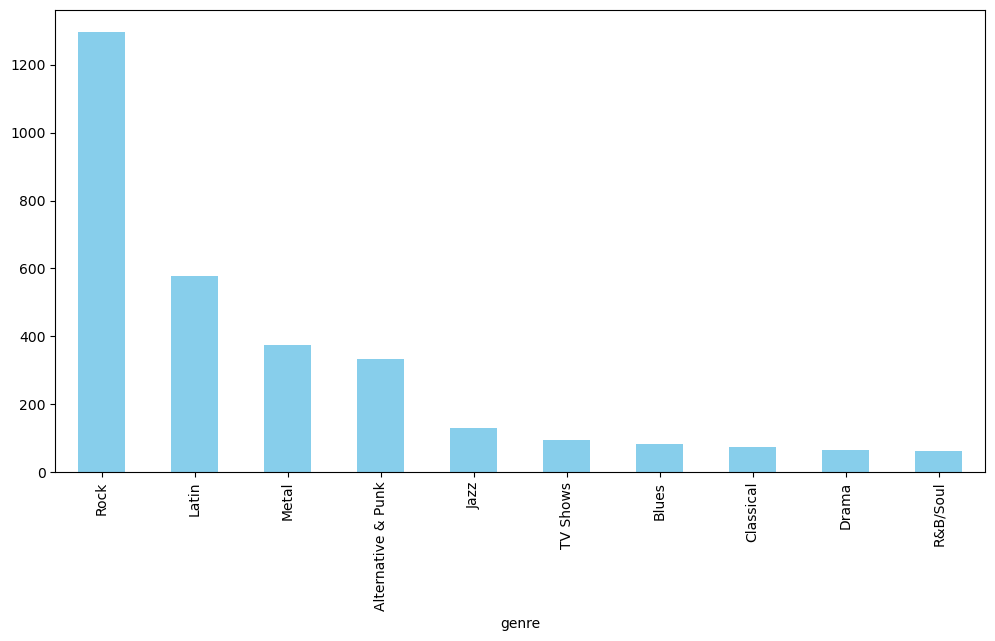

In [23]:
q = '''select count(t.track_id) track_count, g.name genre
        from genre g
        left join track t
        on
        t.genre_id = g.genre_id
        group by 2
        order by 1 desc limit 10
'''
print(sql_query(q))
sql_query(q).plot(kind='bar', x='genre', y='track_count', figsize=(12, 6), legend=False, color='skyblue')

## Q2. Write a query to list the top 10 albums that contain the most tracks.

In [25]:
q = '''select count(t.track_id) Track_Count, al.title album_title
    from album al
    left join track t
    on
    t.album_id = al.album_id
    group by 2
    order by 1 desc limit 10'''

sql_query(q)

,Track_Count,album_title
0,57,Greatest Hits
1,34,Minha Historia
2,30,Unplugged
3,26,"Lost, Season 3"
4,25,"The Office, Season 3"
5,25,"Lost, Season 1"
6,24,My Way: The Best Of Frank Sinatra [Disc 1]
7,24,"Lost, Season 2"
8,24,"Battlestar Galactica (Classic), Season 1"
9,23,Instant Karma: The Amnesty International Campa...


## Q3. Write a query to find the top 10 customers who spent the most money.

In [27]:
q = """select c.first_name ||" "|| c.last_name Customer_name,
        count(inv.invoice_id) No_of_Invoices,
        sum(inv.total) Total_spent
        from customer c
        inner join invoice inv
        on
        c.customer_id = inv.customer_id
        group by c.customer_id
        order by 3 DESC limit 10

"""
sql_query(q)

,Customer_name,No_of_Invoices,Total_spent
0,František Wichterlová,18,144.54
1,Helena Holý,12,128.70
2,Hugh O'Reilly,13,114.84
3,Manoj Pareek,13,111.87
4,Luís Gonçalves,13,108.90
5,Fernanda Ramos,15,106.92
6,João Fernandes,13,102.96
7,François Tremblay,9,99.99
8,Wyatt Girard,11,99.99
9,Jack Smith,12,98.01


## Q4. Write a query to find the top 5 artists who generated the highest revenue from track sales.

In [49]:
q = '''select ar.name as artist, SUM(il.unit_price * il.quantity) AS total_revenue
    FROM invoice_line il
JOIN track t ON il.track_id = t.track_id
JOIN album al ON t.album_id = al.album_id
JOIN artist ar ON al.artist_id = ar.artist_id
GROUP BY ar.artist_id
ORDER BY total_revenue DESC LIMIT 5'''

sql_query(q)



,artist,total_revenue
0,Queen,190.08
1,Jimi Hendrix,185.13
2,Red Hot Chili Peppers,128.70
3,Nirvana,128.70
4,Pearl Jam,127.71


## Q5. Countries by Average Revenue per Invoice

In [51]:
q = '''SELECT 
    c.country,
    ROUND(AVG(inv.total), 2) AS avg_invoice_revenue
FROM invoice inv
JOIN customer c ON inv.customer_id = c.customer_id
GROUP BY c.country
ORDER BY avg_invoice_revenue DESC;'''

sql_query(q)


,country,avg_invoice_revenue
0,Czech Republic,9.11
1,Spain,8.91
2,Ireland,8.83
3,United Kingdom,8.77
4,India,8.72
5,Belgium,8.63
6,Germany,8.16
7,Australia,8.12
8,Norway,8.03
9,USA,7.94


## Q6. Write a query to find the media type with number of tracks.


In [53]:
q = '''SELECT 
    mt.name AS media_type,
    COUNT(t.track_id) AS track_count
FROM media_type mt
LEFT JOIN track t ON t.media_type_id = mt.media_type_id
GROUP BY mt.media_type_id, mt.name
ORDER BY track_count DESC;'''

sql_query(q)

,media_type,track_count
0,MPEG audio file,3034
1,Protected AAC audio file,237
2,Protected MPEG-4 video file,214
3,AAC audio file,11
4,Purchased AAC audio file,7


## Q7. Which artists have released tracks in more than one genre?

In [55]:

q = '''SELECT 
    ar.name AS artist,
    COUNT(DISTINCT t.genre_id) AS genre_count
FROM artist ar
JOIN album al ON ar.artist_id = al.artist_id
JOIN track t ON al.album_id = t.album_id
WHERE t.genre_id IS NOT NULL
GROUP BY ar.artist_id, ar.name
HAVING COUNT(DISTINCT t.genre_id) > 1
ORDER BY genre_count DESC;'''

sql_query(q)



,artist,genre_count
0,Iron Maiden,4
1,Audioslave,3
2,Various Artists,3
3,Gilberto Gil,3
4,Jamiroquai,3
5,Lenny Kravitz,3
6,Battlestar Galactica,3
7,Antônio Carlos Jobim,2
8,Eric Clapton,2
9,Faith No More,2


## Q8. Write a query to list the top 10 longest tracks by duration.

In [59]:



q = '''SELECT 
    name AS track_name,
    milliseconds  AS duration_minutes
FROM track
ORDER BY milliseconds DESC
LIMIT 10;'''

sql_query(q)

,track_name,duration_minutes
0,Occupation / Precipice,5286953
1,Through a Looking Glass,5088838
2,"Greetings from Earth, Pt. 1",2960293
3,The Man With Nine Lives,2956998
4,"Battlestar Galactica, Pt. 2",2956081
5,"Battlestar Galactica, Pt. 1",2952702
6,Murder On the Rising Star,2935894
7,"Battlestar Galactica, Pt. 3",2927802
8,Take the Celestra,2927677
9,Fire In Space,2926593


## Q9. Top 5 Revenue Share percentage by Artist (Pie Chart)

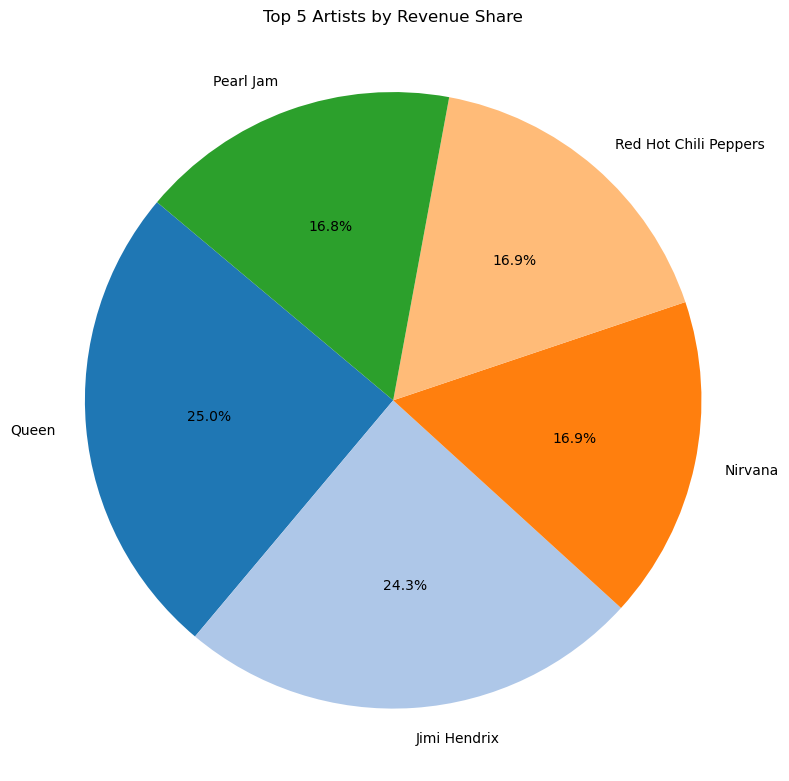

In [61]:
import matplotlib.pyplot as plt

q = '''
SELECT 
    ar.name AS artist,
    ROUND(SUM(il.unit_price * il.quantity), 2) AS total_revenue
FROM invoice_line il
JOIN track t ON il.track_id = t.track_id
JOIN album al ON t.album_id = al.album_id
JOIN artist ar ON al.artist_id = ar.artist_id
GROUP BY ar.artist_id, ar.name
ORDER BY total_revenue DESC
LIMIT 5;
'''

df = pd.read_sql_query(q, conn)
plt.figure(figsize=(8, 8))
plt.pie(
    df['total_revenue'], 
    labels=df['artist'], 
    autopct='%1.1f%%', 
    startangle=140,
    colors=plt.cm.tab20.colors
)
plt.title('Top 5 Artists by Revenue Share')
plt.axis('equal')  # Equal aspect ratio ensures pie is circular
plt.tight_layout()
plt.show()

## Q10. Revenue by Genre (Rock, Latin, Metal) in Each Country (Stacked Column Chart)

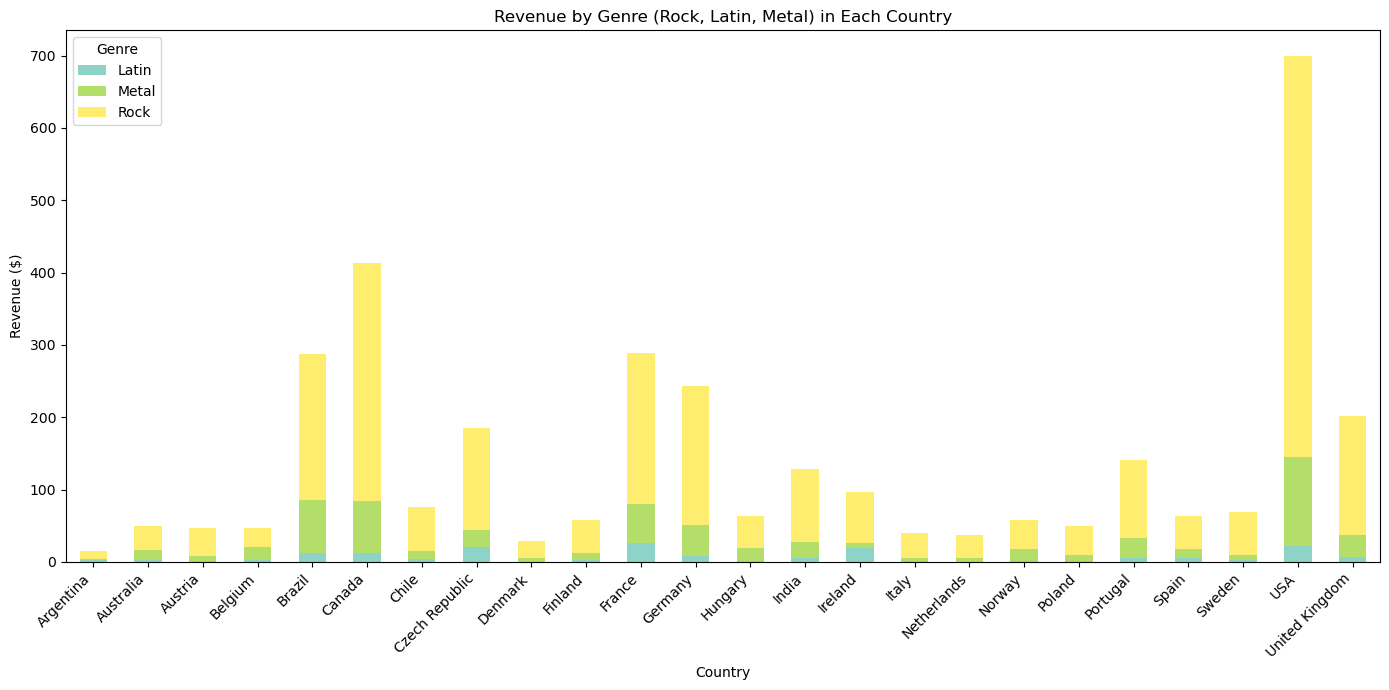

In [63]:
q = '''
SELECT 
    c.country,
    g.name AS genre,
    ROUND(SUM(il.unit_price * il.quantity), 2) AS revenue
FROM invoice_line il
JOIN invoice i ON il.invoice_id = i.invoice_id
JOIN customer c ON i.customer_id = c.customer_id
JOIN track t ON il.track_id = t.track_id
JOIN genre g ON t.genre_id = g.genre_id
WHERE g.name IN ('Rock', 'Latin', 'Metal')
GROUP BY c.country, g.name
ORDER BY c.country, g.name;
'''

df = pd.read_sql_query(q, conn)

pivot_df = df.pivot(index='country', columns='genre', values='revenue').fillna(0)

pivot_df.plot(kind='bar', stacked=True, figsize=(14, 7), colormap='Set3')

plt.title('Revenue by Genre (Rock, Latin, Metal) in Each Country')
plt.xlabel('Country')
plt.ylabel('Revenue ($)')
plt.legend(title='Genre')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()
